In [ ]:
import nltk
# Download the IMDb movie reviews dataset
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import movie_reviews
# Access the movie reviews and labels
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
# Shuffle the documents to ensure a balanced distribution of positive and negative reviews
import random
random.shuffle(documents)



In [ ]:
# Print the first review and its label
print("Sample Review:", documents[0][0][:10]) # Displaying the first 10 words for brevity
print("Label:", documents[0][1])

print(type(documents))

# Print the number of documents
print(len(documents))
print("\n")


# Print the first few documents
for doc in documents[:2]:  # Adjust the number to see more or fewer samples
    print(doc)
    print("Review length:", len(doc[0]))  # Print the length of the document
    print("Lable:", doc[1])  # Print the category of the document
    print("\n")

Sample Review: ['in', 'this', 'good', 'natured', ',', 'pleasent', 'and', 'easy', 'going', 'comedy']
Label: pos
<class 'list'>
2000


(['in', 'this', 'good', 'natured', ',', 'pleasent', 'and', 'easy', 'going', 'comedy', ',', 'bill', 'murray', '(', 'ghostbusters', ',', '1984', ')', 'plays', 'grumpy', 'weatherman', 'phil', 'conners', ',', 'who', ',', 'every', 'year', ',', 'is', 'sent', 'to', 'punxsutawney', ',', 'p', '.', 'a', ',', 'to', 'report', 'on', 'groundhog', 'day', '.', 'the', 'groundhog', 'day', 'ceremony', 'involves', 'a', 'groundhog', 'being', 'lifted', 'out', 'of', 'a', 'box', ',', 'and', 'if', 'he', 'dosen', "'", 't', 'see', 'a', 'shadow', ',', 'it', 'will', 'be', 'an', 'early', 'spring', '.', 'phil', 'really', 'hates', 'the', 'ceremony', ',', 'and', 'not', 'even', 'his', 'producer', 'rita', '(', 'macdowell', ')', 'can', 'change', 'his', 'mind', '.', 'however', ',', 'fate', 'has', 'a', 'cruel', 'trick', 'for', 'phil', ',', 'and', 'he', 'starts', 're', '-', 'living', 'groundho

## 1. Data Preparation (3 marks)

In [ ]:
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import random

# Initialize stemmer/lemmatizer and stopwords
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess the text
def preprocess(document):
    # Tokenize
    tokens = word_tokenize(document)

    processed = []
    # Stemming/Lemmatization and Stop words removal
    for word in tokens:
        if word.lower() not in stop_words and word.isalpha():
            processed.append(stemmer.stem(word.lower()))

    return processed

# Preprocess the documents
preprocessed_documents = [(preprocess(' '.join(doc)), label) for doc, label in documents]



In [ ]:
#After stemming all reviews in documents

for doc in preprocessed_documents[:2]:  # Adjust the number to see more or fewer samples
    print(doc)
    print("Document length:", len(doc[0]))  # Print the length of the document
    print("Category:", doc[1])  # Print the category of the document
    print("\n")

(['rock', 'actual', 'lot', 'rock', 'fli', 'us', 'us', 'slow', 'fast', 'motion', 'sever', 'point', 'film', 'seem', 'like', 'danger', 'rock', 'kind', 'twirl', 'air', 'instead', 'propel', 'forward', 'land', 'need', 'break', 'space', 'sequenc', 'caus', 'damag', 'enough', 'destroy', 'chrysler', 'build', 'like', 'nari', 'mention', 'apocalypt', 'event', 'made', 'occur', 'also', 'might', 'interest', 'element', 'armageddon', 'steroid', 'user', 'answer', 'deep', 'impact', 'bruce', 'willi', 'star', 'harri', 'stamper', 'fame', 'oil', 'driller', 'commiss', 'white', 'hous', 'nasa', 'stop', 'giant', 'asteroid', 'travel', 'beyond', 'zero', 'barrier', 'destroy', 'planet', 'oil', 'driller', 'requir', 'someon', 'experi', 'deep', 'core', 'mine', 'plant', 'nuclear', 'missil', 'said', 'asteroid', 'one', 'unintent', 'hilari', 'sequenc', 'nasa', 'ask', 'harri', 'inspect', 'deep', 'core', 'driller', 'built', 'base', 'blueprint', 'poorli', 'construct', 'harri', 'critic', 'almost', 'everi', 'aspect', 'trust', 'n

## 2. Coverage Analysis Insights (2 marks):

In [ ]:

from typing import List,Tuple

# Initialize stemmer/lemmatizer and stopwords
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def analysis_coverage_in_preprocess(documents):
    """
    Analyzes the coverage of unique words in documents after preprocessing.

    """
    unique_tokens = set()
    processed = set()

    num_tokens_considered = [0]
    cumulative_coverage = [0]

    for words, label in documents:

        for i,token in enumerate(words):

            lower_token = token.lower()
            unique_tokens.add(lower_token)

            #Remove stop word, and lematizing
            if lower_token not in stop_words and lower_token.isalpha():

                # processed.add(lemmatizer.lemmatize(lower_token))
                processed.add(lower_token)

                #processed coverage
                coverage = len(processed) / len(unique_tokens)

                cumulative_coverage.append(coverage)
                num_tokens_considered.append(len(unique_tokens))



    return num_tokens_considered, cumulative_coverage

# Recording
num_tokens_considered, cumulative_coverage = analysis_coverage_in_preprocess(documents)

In [ ]:
#preview
num_tokens_considered[-1]
cumulative_coverage[:5]

[0, 0.3333333333333333, 0.5, 0.5, 0.5]

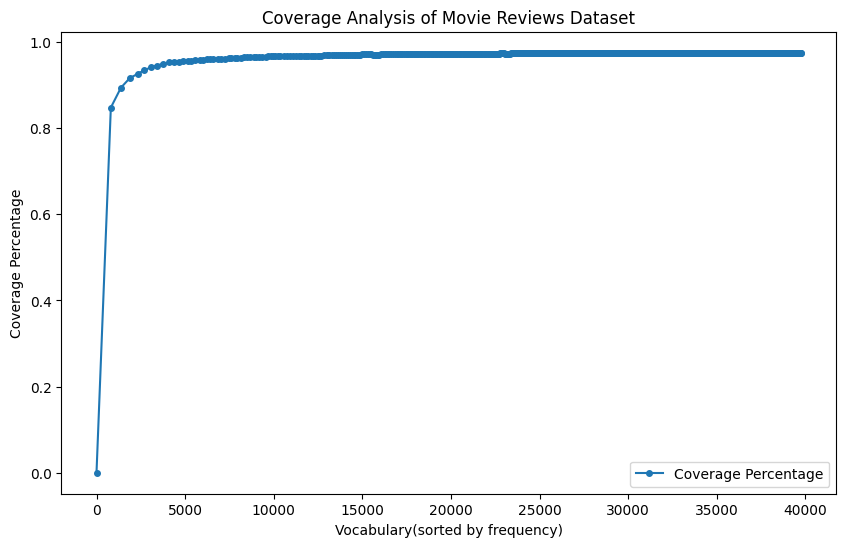

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(num_tokens_considered[::1000], cumulative_coverage[::1000], '-o', markersize=4, label='Coverage Percentage')
plt.xlabel('Vocabulary(sorted by frequency)')
plt.ylabel('Coverage Percentage')
plt.title('Coverage Analysis of Movie Reviews Dataset')
plt.legend()
plt.grid(False)

# plt.xlim(0,35000)
# plt.ylim(0,1)

plt.show()

### How does the coverage change with the number of tokens considered?

`The coverage increases as the number of considered tokens grows, eventually reaching a point of stabilization.`

### At what point does the coverage seem to stabilize?
` vocab size at 5000, ~97%`

### Are there diminishing returns in terms of coverage as the number of tokens increases?
`Yes`

As more tokens are considered, you start encountering less frequent words. These words add incrementally less to the overall coverage since they are less common or more specialized. Eventually, each new token adds very little to the coverage as you start encountering rare or highly specific words.

## Rationalization for Vocabulary Choice:

###I. Trade-off Between Larger Vocabulary and Computational Efficiency:

A larger vocab can capture more info in the data, improving model's accuracy and process a wider range of sentences. However, increase memory requirement and computational complexity.  

</br>

###II. Impact of Rare or Very Common Words:
Rare words can be very informative or irrelevant noise. Too many rare words leads to overfitting. Very common words are not informative based on zipf's law. Model should focus on more meaningful content.

</br>

###III. Balancing Informativeness and Model Complexity:
The goal is to find a vocabulary size that captures the most informative features without making the model overly complex.

</br>

`Naive Bayes:` This algorithm can work well with large vocabularies but might be sensitive to the presence of rare words which can skew the probability estimates.

`Logistic Regression:` This algorithm can handle sparse data, but a very large vocabulary can lead to long training times and overfitting.

`MLP (Multi-Layer Perceptron):` Neural network models like MLPs can require substantial computational resources, especially with large vocabularies. They can benefit from a well-optimized vocabulary to reduce training time and memory usage.

## 3. Algorithm Implementation (6 marks):

In [ ]:
from sklearn.model_selection import train_test_split

# documents preparation
# Combining the words back into documents
documents = [(" ".join(words), label) for words, label in preprocessed_documents]

# Separate the documents and their labels
X, y = zip(*documents)

#Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### a. Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.corpus import movie_reviews



In [ ]:
# TF representation
tf_vectorizer = CountVectorizer()
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)


In [ ]:
# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
# Training with TF
clf_nb_tf = MultinomialNB()
clf_nb_tf.fit(X_train_tf, y_train)

# Training with TF-IDF
clf_nb_tfidf = MultinomialNB()
clf_nb_tfidf.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
# Evaluating the TF model
y_pred_tf = clf_nb_tf.predict(X_test_tf)
accuracy_tf = accuracy_score(y_test, y_pred_tf)

# Evaluating the TF-IDF model
y_pred_tfidf = clf_nb_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print(f"Naive Bayes Accuracy with TF: {accuracy_tf}")
print(f"Naive Bayes Accuracy with TF-IDF: {accuracy_tfidf}")


Naive Bayes Accuracy with TF: 0.7966666666666666
Naive Bayes Accuracy with TF-IDF: 0.785


###b. Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

# Training with TF
clf_lr_tf = LogisticRegression(max_iter=1000)
clf_lr_tf.fit(X_train_tf, y_train)

# Training with TF-IDF
clf_lr_tfidf = LogisticRegression(max_iter=1000)
clf_lr_tfidf.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Evaluating the TF model
y_pred_tf = clf_lr_tf.predict(X_test_tf)
accuracy_tf = accuracy_score(y_test, y_pred_tf)

# Evaluating the TF-IDF model
y_pred_tfidf = clf_lr_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print(f"Logistic Regression Accuracy with TF: {accuracy_tf}")
print(f"Logistic Regression Accuracy with TF-IDF: {accuracy_tfidf}")


Logistic Regression Accuracy with TF: 0.84
Logistic Regression Accuracy with TF-IDF: 0.8283333333333334


### c. Multilayer Perceptron (MLP):

In [ ]:
from sklearn.neural_network import MLPClassifier

# Define the MLP classifier with a specific architecture, e.g., one hidden layer with 100 neurons
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# Train with TF
mlp.fit(X_train_tf, y_train)
y_pred_tf = mlp.predict(X_test_tf)
accuracy_tf = accuracy_score(y_test, y_pred_tf)

# Train with TF-IDF
mlp.fit(X_train_tfidf, y_train)
y_pred_tfidf = mlp.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print(f"MLP Accuracy with TF (100 neurons): {accuracy_tf}")
print(f"MLP Accuracy with TF-IDF (100 neurons): {accuracy_tfidf}")



MLP Accuracy with TF (100 neurons): 0.84
MLP Accuracy with TF-IDF (100 neurons): 0.8133333333333334


## 4. Training and Evaluation (4 marks):

In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_performance_metrics(y_true, y_pred):
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity)
    fpr = fp / (fp + tn)  # False Positive Rate

    return accuracy, tpr, fpr

# NB Predict on the test set
y_pred_nb_tf = clf_nb_tf.predict(X_test_tf)

# Calculate performance metrics
accuracy_nb_tf, tpr_nb_tf, fpr_nb_tf = calculate_performance_metrics(y_test, y_pred_nb_tf)

print(f"Multinomial Naive Bayes (TF) - Accuracy: {accuracy_nb_tf}, TPR: {tpr_nb_tf}, FPR: {fpr_nb_tf}")



Multinomial Naive Bayes (TF) - Accuracy: 0.7966666666666666, TPR: 0.7945205479452054, FPR: 0.2012987012987013


In [ ]:
# LR Predict on the test set
y_pred_lr_tf = clf_lr_tf.predict(X_test_tf)

# Calculate performance metrics
accuracy_lr_tf, tpr_lr_tf, fpr_lr_tf = calculate_performance_metrics(y_test, y_pred_lr_tf)

print(f"Logistic Regression (TF) - Accuracy: {accuracy_lr_tf}, TPR: {tpr_lr_tf}, FPR: {fpr_lr_tf}")


Logistic Regression (TF) - Accuracy: 0.84, TPR: 0.8253424657534246, FPR: 0.1461038961038961


In [ ]:
# LR Predict on the test set
y_pred_mlp_tf = mlp.predict(X_test_tf)

# Calculate performance metrics
accuracy_mlp_tf, tpr_mlp_tf, fpr_mlp_tf = calculate_performance_metrics(y_test, y_pred_mlp_tf)

print(f"MLP-based Classifier (TF) - Accuracy: {accuracy_mlp_tf}, TPR: {tpr_mlp_tf}, FPR: {fpr_mlp_tf}")


MLP-based Classifier (TF) - Accuracy: 0.8416666666666667, TPR: 0.9006849315068494, FPR: 0.21428571428571427


## 5. Visualization and Analysis (2 marks):

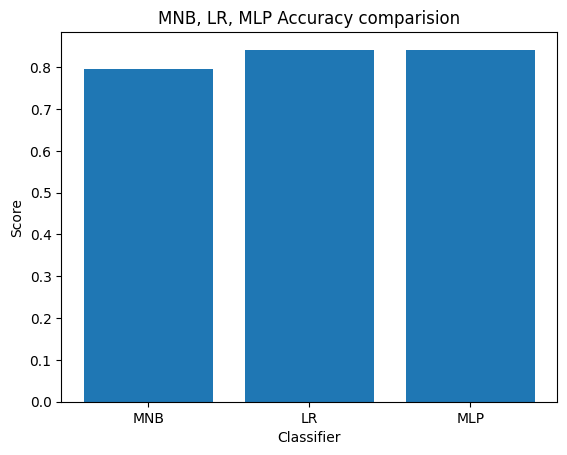

In [ ]:
# Accuracy

import matplotlib.pyplot as plt

# Sample data
clfs = ["MNB", "LR", "MLP"]
values = [accuracy_nb_tf, accuracy_lr_tf, accuracy_mlp_tf]

# Creating the bar chart
plt.bar(clfs, values)

# Adding titles and labels
plt.title("MNB, LR, MLP Accuracy comparision")
plt.xlabel("Classifier")
plt.ylabel("Score")

# Display the chart
plt.show()



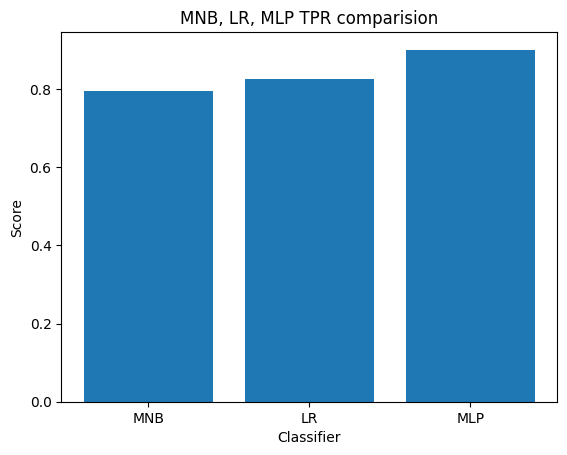

In [ ]:
# TPR

import matplotlib.pyplot as plt

# Sample data
clfs = ["MNB", "LR", "MLP"]
values = [tpr_nb_tf, tpr_lr_tf, tpr_mlp_tf]

# Creating the bar chart
plt.bar(clfs, values)

# Adding titles and labels
plt.title("MNB, LR, MLP TPR comparision")
plt.xlabel("Classifier")
plt.ylabel("Score")

# Display the chart
plt.show()



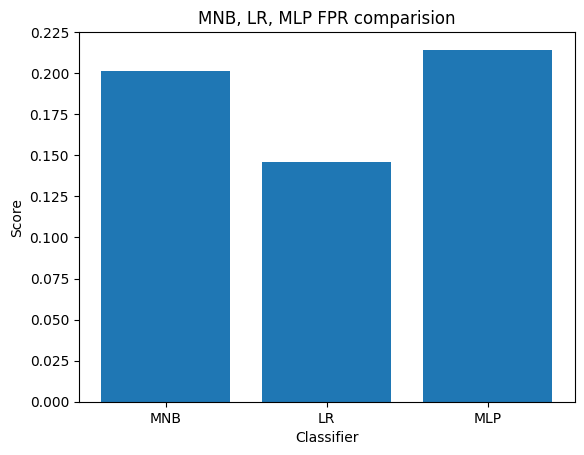

In [ ]:
# FPR

import matplotlib.pyplot as plt

# Sample data
clfs = ["MNB", "LR", "MLP"]
values = [fpr_nb_tf, fpr_lr_tf, fpr_mlp_tf]

# Creating the bar chart
plt.bar(clfs, values)

# Adding titles and labels
plt.title("MNB, LR, MLP FPR comparision")
plt.xlabel("Classifier")
plt.ylabel("Score")

# Display the chart
plt.show()



## 6. Discussion (3 marks):


For accuracy, three classifier achieve almost the same result. For TPR, MLP > LR > MNB. For FPR, LR>MNB = MLP


For accuracy, all three classifiers (Multinomial Naive Bayes (MNB), Logistic Regression (LR), and Multi-Layer Perceptron (MLP)) achieving similar accuracy suggests that they are equally effective overall in classifying the dataset.

For TPR:
MLP > LR > MNB: This ranking indicates that the MLP is best at identifying positive cases. The MLP's complex architecture allows it to capture nuanced patterns in the data, leading to better identification of true positives.

For FPR:
LR > MNB = MLP: Logistic Regression having a higher FPR suggests that while it's good at identifying positive cases, it also misclassifies more negative cases as positive. This could be due to LR's linear decision boundary being less nuanced in certain scenarios.

The ideal model achieves a high TPR with a low FPR.

## Discuss the impact of using TF vs. TF-IDF on classification performance.

Term Frequency(TF) emphasizes on commonly words that occur frequently in a specific document, under the assumption that frequent words are more relevant to the document's topic.

However, common words might be less informative and potentially dilute the classifier's ability to focus on more meaningful terms.

TF-IDF reduces noise by identifying unique words that are crucial for classifying a movie review. It could enable classifiers to focus more on distinctive words. MLP and LR could be benifited from it.